## Digit Recognizer Kaggle Competition

### Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras import datasets, layers, models


### Loading MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Normalization
x_train = x_train/255
x_test = x_test/255

# Reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
SHAPE = 28

### Dataset

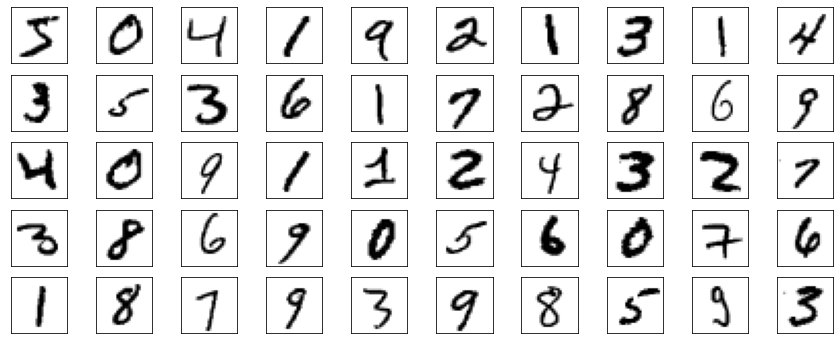

In [25]:
# Multiplot
plt.figure(figsize=(15,6))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
plt.show()

### Model Building

In [5]:
def model_builder(n_classes=10, train_shape=(SHAPE, SHAPE,1)):
  
  # Sequential Model
  cnn_model = keras.Sequential()
  
  # Convolution 2D + Max Pooling + Dropout
  cnn_model.add(layers.Conv2D(256,(3,3), activation='relu',input_shape=train_shape))
  cnn_model.add(layers.MaxPooling2D((2,2)))
  cnn_model.add(layers.Dropout(0.3))

  cnn_model.add(layers.Conv2D(128,(3,3), activation='relu'))
  cnn_model.add(layers.MaxPooling2D((2,2)))
  cnn_model.add(layers.Dropout(0.5))

  cnn_model.add(layers.Conv2D(64,(3,3), activation='relu'))
  cnn_model.add(layers.MaxPooling2D((2,2)))
  cnn_model.add(layers.Dropout(0.2))

  # Flattening
  cnn_model.add(layers.Flatten())
  cnn_model.add(layers.Dense(512, activation = 'relu'))
  cnn_model.add(layers.Dropout(0.2))
  cnn_model.add(layers.Dense(256, activation = 'relu'))
  cnn_model.add(layers.Dropout(0.2))

  # Output
  cnn_model.add(layers.Dense(units = 10))

 
  # Compile
  cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 3e-4), 
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  
  # Summary
  cnn_model.summary()
 
  return cnn_model

#### Callbacks

In [6]:
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Learning Rate Reduction
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                            patience=2,
                                                            verbose=2,
                                                            factor=0.5,
                                                            min_lr=0.00001)
reduce_lr =  keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.00001)

In [7]:
model = model_builder()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

#### Model Fitting

In [8]:
history = model.fit(x_train,y_train,epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/10
1875/1875 [==============================] - 29s 8ms/step - loss: 0.4826 - accuracy: 0.8422 - val_loss: 0.1046 - val_accuracy: 0.9697 - lr: 3.0000e-04
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1607 - accuracy: 0.9512 - val_loss: 0.0632 - val_accuracy: 0.9817 - lr: 3.0000e-04
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1198 - accuracy: 0.9637 - val_loss: 0.0545 - val_accuracy: 0.9835 - lr: 3.0000e-04
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0999 - accuracy: 0.9696 - val_loss: 0.0498 - val_accuracy: 0.9858 - lr: 3.0000e-04
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0901 - accuracy: 0.9735 - val_loss: 0.0441 - val_accuracy: 0.9875 - lr: 3.0000e-04
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0783 - accuracy: 0.9767 - val_loss: 0.0427 - val_accuracy: 0.9876 - lr: 3.0000e-04
Epoch 7/10
1875/1875 [=====

### Prediction

In [10]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


### Plotting Predictions

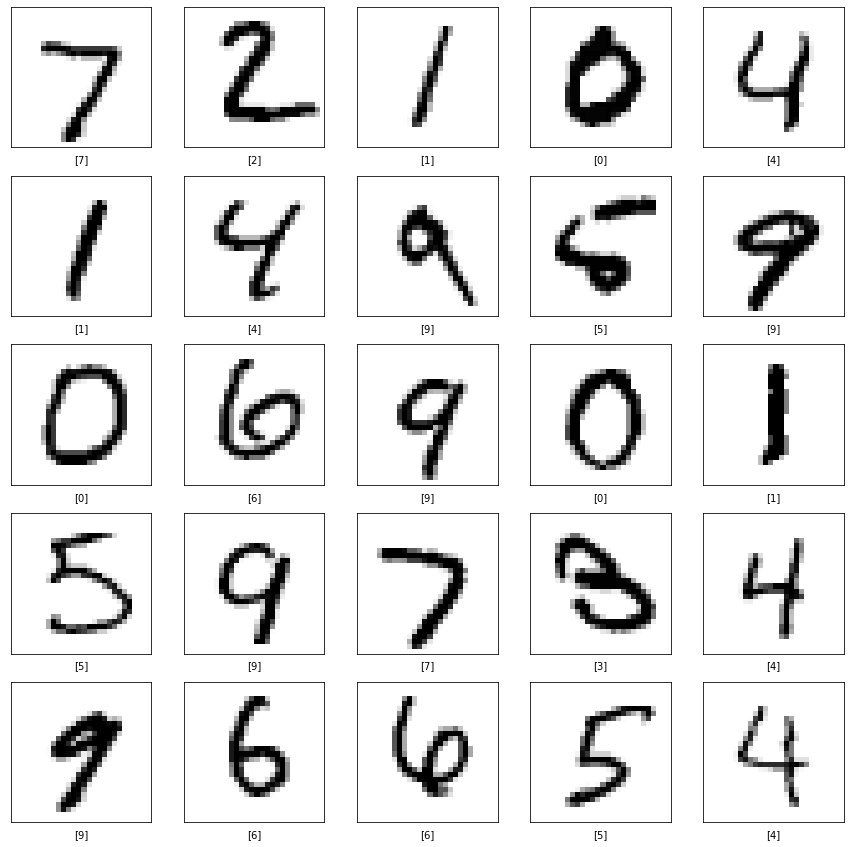

In [16]:
# Multiplot with labels
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel([np.argmax(predictions[i])])
    
    
plt.show()

In [ ]:
model = keras.models.load_model('D:/Software Development/PythonLearning/Curso-Python/0.1 Python_Proyects/IA/HandsWritting_Numbers/saved_model/Digit_Recognizer_Model.h5')